# 東証グロース２５０ＥＴＦ 日足

In [1]:
import sys
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

try:
    __file__
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    from pathlib import Path
    Path().resolve()
    sys.path.append(os.path.join(Path().resolve(), '..'))

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '2516.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-09-05 00:00:00+09:00,507.799988,521.900024,506.500000,512.900024,2352350,0.0,0.0,0.0
2024-09-06 00:00:00+09:00,515.700012,517.299988,500.000000,505.799988,1671290,0.0,0.0,0.0
2024-09-09 00:00:00+09:00,487.799988,507.399994,485.799988,503.899994,2410170,0.0,0.0,0.0
2024-09-10 00:00:00+09:00,506.299988,511.600006,501.200012,508.200012,1253460,0.0,0.0,0.0
2024-09-11 00:00:00+09:00,508.899994,511.799988,487.100006,492.500000,1969210,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-02-27 00:00:00+09:00,522.900024,527.700012,520.900024,524.000000,301230,0.0,0.0,0.0
2025-02-28 00:00:00+09:00,518.099976,522.200012,507.000000,510.700012,1192800,0.0,0.0,0.0
2025-03-03 00:00:00+09:00,519.200012,521.900024,514.200012,518.000000,373280,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

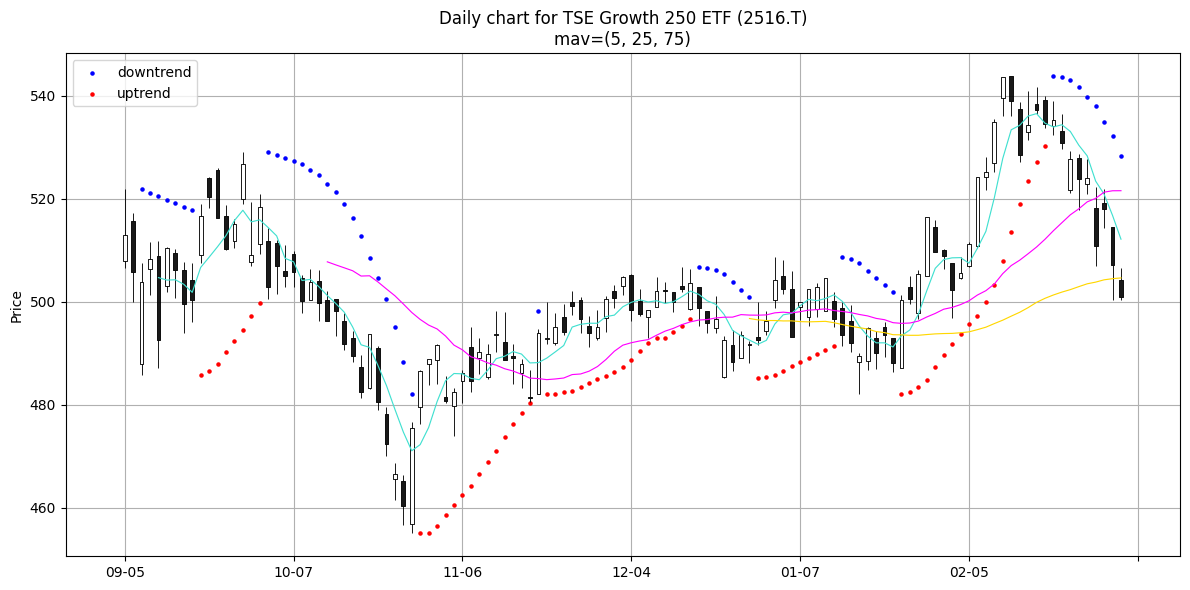

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-01-20 00:00:00+09:00    494.899994
2025-01-21 00:00:00+09:00    494.899994
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-01-20 00:00:00+09:00    NaN
2025-01-21 00:00:00+09:00    0.0
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    493.320001
2025-01-21 00:00:00+09:00    492.959998
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    497.224
2025-01-21 00:00:00+09:00    496.936
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    494.675999
2025-01-21 00:00:00+09:00    494.251999
Name: Close, dtype: float64